In [1]:
import ipywidgets as widgets
import sys
from IPython.display import display
from IPython.display import clear_output

def create_multipleChoice_widget(description, options, correct_answer):
    if correct_answer not in options:
        options.append(correct_answer)
    
    correct_answer_index = options.index(correct_answer)
    
    radio_options = [(words, i) for i, words in enumerate(options)]
    alternativ = widgets.RadioButtons(
        options = radio_options,
        description = '',
        disabled = False
    )
    
    description_out = widgets.Output()
    with description_out:
        print(description)
        
    feedback_out = widgets.Output()

    def check_selection(b):
        a = int(alternativ.value)
        if a==correct_answer_index:
            s = '\x1b[6;30;42m' + "Correct!" + '\x1b[0m' +"\n" #green color
        else:
            s = '\x1b[5;30;41m' + "Wrooong..." + '\x1b[0m' +"\n" #red color
        with feedback_out:
            clear_output()
            print(s)
        return
    
    check = widgets.Button(description="submit")
    check.on_click(check_selection)
    
    
    return widgets.VBox([description_out, alternativ, check, feedback_out])

In [2]:
Q1 = create_multipleChoice_widget('Econometrics is the branch of economics that is interested in establishing',['the models with best curve fit','causality by combining economics and statistics','mathematical calculations to predict behavior'],'causality by combining economics and statistics')
Q2 = create_multipleChoice_widget('Difference between Econometrics and Data Science is',['Approach to the problem of prediction','The amount of data used','Only one of them uses OLS'],'Approach to the problem of prediction')
Q3 = create_multipleChoice_widget('Which of the following is better to predict how prices during COVID19 change',['Just try to fit best past prices','Combine data with an economic model','There is nothing we can do'],'Combine data with an economic model')
Q4 = create_multipleChoice_widget('As what kind of data set would you describe the titanic data?',['Time Series','Cross Section','Panel'],'Cross Section')


# Overview 

0. ***Intro: Econometrics and Python***
1. ***Explorative data analysis and plausibility tests using the Titanic incidence***
2. Linear regression analysis using the Bordeaux-wine case
3. Inference and hypothesis testing using the Monte Carlo and Guiness principles
4. Difference-in-differences approach using the fast-food and easy-money conjectures

# 0. Intro

***A few words about me: Dennis Rickert (CV)***

Assistant Professor at the Centre for Industrial Economics (CERNA) at MINES Paris, PSL University.

Before I was Marie-Curie Fellow at the Toulouse School of Economics (TSE).  

PhD from the Düsseldorf Institute of Competition Economics (DICE)

***Research Interests***
    
Methodology: Causal inference using economic theory, empirical methods, and data. 

Research Topics:
- How does illegal firm behavior (collusion) affect prices, product introduction, and investment?
- Is increasing size of producers (Nestle, Unilever) and retailers (Walmart, Carrefour) bad for prices, variety, and innovation?
- Does retail buyer power (e.g., through threat of delisting producers) affect prices and variety?
- Under which circumstances can mergers benefit consumers?

New Agenda: 
- Effectives of Evaluation of Public Policies 
- Cost Pass-through

***Selected Academic Articles & Grants***

ANR JCJC Research Grant "*Firm Size, Vertical Relations, and Innovation. An Analysis through the Lens of Structural Models*. 

*Vertical Restraints, Pass-Through, and Market Definition: Evidence from Grocery Retailing*, International Journal of Industrial Organization 74 (2021).

*The Effect of Mergers on Retail Prices: Evidence from Germany, Journal of Industrial Economics*, Volume 69 (3), December 2021

*How Resale Price Maintenance and Loss Leading affect Upstream Cartel Stability: Anatomy of a Coffee Cartel*, International Journal of Industrial Organization, forthcoming

*When Switching Costs Benefit Consumers. Evidence from Consumer Life Cycles*. Beiträge zur Jahrestagung des Vereins für Socialpolitik 2016: Demographischer Wandel - Session: Empirical IO, No. A02-V2

***Professional Services***

- Student Research Assistant at DICE
- Research Assistant at German Monopolies Commission
- Consulting for: 
    - Cartel Office on the role of shopping costs in merger evaluation 
    - German Retail Federation on the harm of buyer power 
    - Victims harmed by the international truck cartel
- Referee in journals, such as International Journal of Industrial Organization; American Journal of Agricultural Economics; Telecommunications Policy; B.E. Journal of Economic Analysis and Policy


# 0. Basics: Data Science vs Econometrics

***About the difference between data science and econometrics. Listen to ...***

<br>  

<center><img src="figs/angrist_wiki.jpg" , width=600, height=300/> 
    
<p>

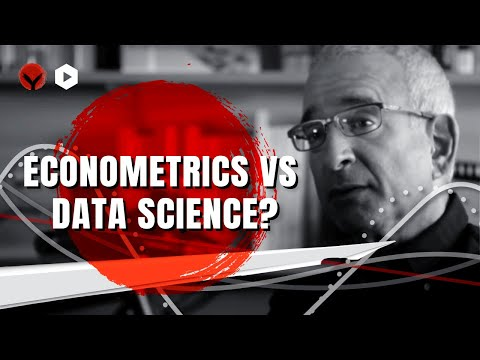

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo('2EhRT2mOXm8' , width=800, height=300)



In [5]:
display(Q1)
display(Q2)
display(Q3)

# 0. Basics: Python as a tool for Data Science and Econometrics

***Python*** Object-oriented language, where objects can be almost everything  

***Variables*** Entries of information. Suppose you want to store name and marks of university students 

***Data*** Collection of raw variables (and results of functions), e.g., stored in lists, arrays, dataframes, dictionaries 

***Function*** produces outputs based on input arguments: Check if students passed or fail given criteria (e.g., 50%).   

***Objects*** Data (and functions) are grouped into single entity for better organisation of the code. An object could be student 1 containing [Name = Hans Gruber, Mark = 100, check_pass_fail()]. 

***Attributes and Methods*** When dealing with objects: variables are called attributes and functions are called methods 

***Class*** user-defined blueprint for the objects. We can create class student. All objects created from this class have  name and marks data and can use the check-pass-fail function. 

<blockquote> Think of class as a blueprint of a house. It contains all the details about floors, doors, windows, etc. Based on these desciptions we can build as many houses as we want. One house is an object.</blockquote>  

***Modules***  files with the . py extension containing Python code that can be imported inside another Python Program

- **Pandas** provide the DataFrame class containing a two-dimensional array (numpy.ndarray), along with various attributes (index, columns, ...) and methods (mean, sd, ...).

- **NumPys** provide the ndarray class possessing numerous attributes and methods

In [6]:
# Example: Define a class before we create objects

class Student: 
    pass

# Create two objects from the Student class 
student1=Student()
student2=Student()

# Now we can add different attributes to objects, e.g., add entry Hans Gruber to name attribute of the student1 object
student1.name = "Hans Gruber"
student1.mark = 100

print(student1.name)
print(student1.mark)

# This is not the proper way to do it. 
# Usually we want to add attributes to our class such that all objects created from this class have these attributes by default. 


Hans Gruber
100


In [8]:
# We can also add methods such that all objects inside the same class have access to the same methods

class Student:
    def check_pass_fail(self): 
        if self.mark >= 50: 
            return True
        else: 
            return False

# Create two objects from the Student class 
student1=Student()
student2=Student()

# All objects inside this class have access to the same method
student1.name = "Hans Gruber"
student1.mark = 100

student2.name = "Gru"
student2.mark = 49

# Access method using student1 object
did_pass=student2.check_pass_fail()
print(did_pass)


False


# 0. Basics: A note for the wary


***Python is open source*** Version conflicts are unavoidable
- modules are under constant regular construction. 
- it exist many environments to access python that can also be updated (Spyder 3, Spyder 5, Jupyter 3, Anaconda 3)
- E.g., the move from Python 2 to 3: many user-written modules used elements from Python 2 that doesn't exist in Python 3  

***Create Virtual environments***

<blockquote> 
    venv (for Python 3) and virtualenv (for Python 2) allow you to manage separate 
    package installations for different projects. They essentially allow you to 
    create a “virtual” isolated Python installation and install packages into 
    that virtual installation. When you switch projects, you can simply create 
    a new virtual environment and not have to worry about breaking the packages 
    installed in the other environments. It is always recommended to use a virtual 
    environment while developing Python applications. https://realpython.com/python-virtual-environments-a-primer/ 
</blockquote>


***Powershell (before you start)***
- python -m venv venv
- venv\Scripts\activate
- python -m pip install statsmodels
- python -m pip install linearmodels
- python -m pip install matplotlib

***Powershell (after you are done)***
- deactivate 


# 1. Explorative data analysis (plausibility tests) using the Titanic incidence

***Learning objectives:***  

- Familiarize with the Python language
- Practice data work
- Derive intuition about plausibility of statistics and patterns that we see in the data


- On April 10, 1912, the RMS Titanic set sail for her maiden voyage from the port of Southampton England 
- In the night from April 14 to April 15, the Titanic  colliding with an iceberg in the North Atlantic.
- The ship sank and 1496 of 2207 died, implying a 32\% survival rate.
- Thomas Andrews, her architect, died in the disaster.
- One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
- Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others.


Announcement for Titanic Maiden Voyage | Sketch of the Titanic  
- | -  
![alt](figs/Titanic_ad.jpg) | ![alt](figs/titanic.jpg) 


***This natural disaster leaves a lot of room for research***

Journal of Economic Perspectives | Rationality and Society  
- | -  
![alt](figs/frey_titanic.jpg) | ![alt](figs/frey_titanic2.jpg) 

    
**Abstract**
<blockquote> 
During the night of April 14, 1912, the RMS Titanic collided with an iceberg on her maiden voyage. Two hours and 40 minutes later she sank, resulting in the loss of 1,501 lives—more than two-thirds of her 2,207 passengers and crew. This remains one of the deadliest peacetime maritime disasters in history and by far the most famous. For social scientists, evidence about how people behaved as the Titanic sunk offers a quasi-natural field experiment to explore behavior under extreme conditions of life and death. A common assumption is that in such situations, self-interested reactions will predominate and social cohesion is expected to disappear. However, empirical evidence on the extent to which people in the throes of a disaster react with self-regarding or with other-regarding behavior is scanty. The sinking of the Titanic posed a life-or-death situation for its passengers. The Titanic carried only 20 lifeboats, which could accommodate about half the people aboard, and deck officers exacerbated the shortage by launching lifeboats that were partially empty. Failure to secure a seat in a lifeboat virtually guaranteed death. We have collected individual-level data on the passengers and crew on the Titanic, which allow us to analyze some specific questions: _______. </blockquote>
    
Please fill out the blank. What do you think could be tested?

From the abstract
- Did physical strength (being male and in prime age) raise the survival chance?
- ... or social status (being a first- or second-class passenger)?  
- Was it favorable for survival to travel alone or in company? 
- Does one's role or function (being a crew member or a passenger) affect the probability of survival?  
- Do social norms, such as "Women and children first!" have any effect? 
- Does age in general affect the chance of survival? 

***Bruno Frey liked his research idea so much that he published the same paper in four journals***

<br>  

<center><img src="figs/plagiarism_frey.jpg" , width=3000, height=2000/> 
    
<p>

***Lesson's learned: self-plagiarism might be legal but unethical*** 
 
<br>  

<center><img src="figs/plagiarism_hunt.jpg" , width=500, height=300/> 
    
<p>

As you learned from Sven, there are many strange academic papers. Do you think this one about the titanic is
- worth publishing?
- interesting enough to be published four times?
- an economics paper?

Discussion Paper | Abstract  
- | -  
![alt](figs/peerreview.jpg) | ![alt](figs/peerreview_abstract.jpg) 


### Part 1 (Ticket Prices and Age)

1. Load the dataset titanic.csv into a dataframe called `df` using `pd.read_csv`. And have a quick glance at the data. 
2. Check if the data makes sense. Are there missing values? Why is the fare 0 for some passengers? Was "Andrews, Mr. Thomas Jr" really on board?
3. Tabulate (or plot) the fare gainst age and describe what you find.  
4. Normally, you should find a positive (unconditional) correlation of fare and age. How do you explain this finding?
5. In which way do you have to arrange the data to show that seniors indeed pay less than younger people?

***1. Load the data***

There are two Titanic data sets in the worldwide web:

1. A full data set from the dalex module that contains information on all passengers (including crew status) but without passenger names
2. A training data set from Kaggle with passenger names but without crew information 
3. We will use both depending on what we want to achieve. For practice you can apply the code on the data that we do not use here.  

Consider the following full data set description from dalex\titanic.csv: 

| Variable| Definition  | Key                       | 
| ---     | ---         | ---                       |  
|survived | Survival    | 0 = No, 1 = Yes           |  
|pclass   | Ticket class|1st, 2nd, 3rd, Detailed Crew (Engineering, Deck, ...) |
|pclass_agg   | Ticket class (aggregated) |1st, 2nd, 3rd, Crew|
|sex      | Gender      | male, female              |
|age      | Age         | in years                  |    
|sibsp    | siblings / spouses aboard               | count (# of)             |
|parch    | parents / children aboard               | count (# of)            |
|fare     | Ticket Price       |     in British Pounds       |
|embarked | Port of Embarkation| Cherbourg, Queenstown, Southampton |


In [12]:
### Loading Modules and Datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

# Dataset 1 (training data with passenger names and aggregated class)
df = pd.read_csv("data/titanic/train.csv")

# Dataset 2 (full data without passenger names but disaggregated class)
df2 = pd.read_csv("data/dalex/titanic.csv")


#### Looking into the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
display(Q4)

***2.Checking for missing values***
- We use the module pandas and seaborn (see above)
- The module pandas (which we store as object) gives us the object data frame
- The module seaborn (which we store as object) gives us the heatmap method
- From the module seaborn (stored as object sns) we want to use method heatmap
- From the pandas module we use the object dataframe and the method isnull
- If we want to use a method from an object we use "."

<AxesSubplot:>

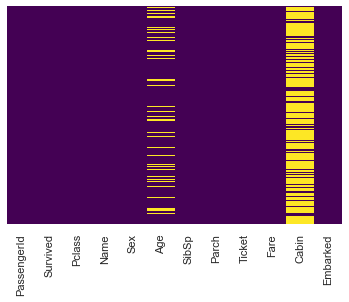

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
# 2. Check for Zero Price ticket
df[df['Fare']==0].sort_values(by=['Ticket'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0,NaN,S


***2. Check for Zero Price ticket***
- Architect on board and likely that he didn't pay. 

What is the first observation about survival probabilities?

**Answer:** beeing a man is correlated with not survivig.

If we check the others: Most of the others were from the shipping- and building companies 

- According to www.encyclopedia-titanica.org, Mr Richard Fry was a nephew of Lord Pirrie, principal owner of Harland & Wolff (the builders of the Titanic). He boarded with a complimentary ticket №112050.

- Mr William Henry Marsh Parr was a managing electrical engineer and chosen to oversee the smooth running of the Titanic’s maiden voyage.

- Mr Johan Vilhelm Henrik Törnqvist and his fellow American Line employees (William Cahoone Johnson Jr., Alfred Johnson, Lionel Leonard) were given third class accommodation aboard their Titanic to make the trip back to New York (ticket number 370160) where they could resume work for the same shipping company

Given this information, the $0 fare doesn’t seem to be a data error.

***3.Tabulate (or plot) the fare gainst age and describe what you find.***

What would you expect?

**Answer:** We expect to find a negative correlation because the Titanic, like other ships and companies, granted senior discounts on ticket fares.

<AxesSubplot:xlabel='Age', ylabel='Fare'>

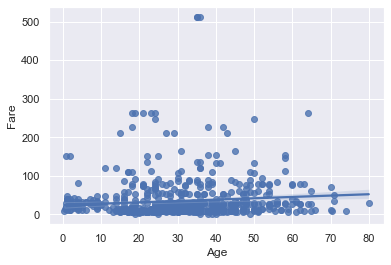

In [16]:
### Correlation of Age and Fare per Ticket Group

### Unconditional Correlation of Age and Fare

# plot with specifying the x, y parameters
# x = df['Age']  
# y = df['Fare']
# sns.regplot(x=x, y=y)

# or use
sns.regplot(data=df, x='Age', y='Fare')


***Questions***
- Why do we see a positive corrlation (meaning that older people pay more)?
- How do we have to "tortute" the data to find the expected result?

Text(29.94068333333334, 0.5, 'Fare')

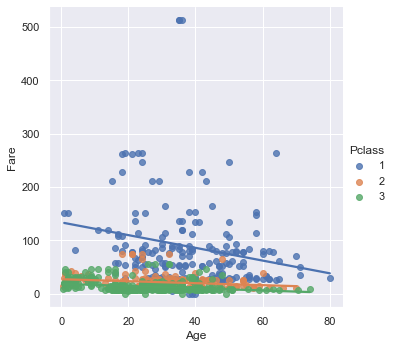

In [18]:
# add regression line per group socio-economic class with Seaborn
sns.lmplot(x="Age", 
           y="Fare", 
           hue="Pclass", # pclass_agg in other data set
           ci=None,
           data=df)
plt.xlabel("Age")
plt.ylabel("Fare")
#plt.savefig("Regression_Line_perGroup.png", format='png',dpi=150)


When looking at each group separetly, there is a tendency of decreasing fares with age
- Without a constraint on passenger class (pclass) the correlation between age and fare is positive.

The intuition is as follows
- The price of fares in the first class are higher + people in higher classes are older 
- People in lower classes tend to be younger either (i) to the fact that there are more children in lower socio-economic status or (ii) because income usually is lower for younger people  
- You can verify that by 
    - plotting the people with age<18 over socio-economic classes. 
    - Comparing the 40-60 and 60-80 bands with the 20-40 band would also show that people tend to be younger in lower classes.

This is an occurence of the Simpson's paradox (or Simpson's reversal). You can also think of it as an omitted variable problem as discussed later in the lecture about endogeneity and instrument variables.   

***Part 2 (Survival Probability)***

The data also provides some information on the survival rate (gender, economic status measured by Pclass, age, crew). Discuss your expectations about the direction of each of these categories on survival rates?

1. Who is more likely to survive? Male or female? Children or grown-ups?
2. Check also survival rates for family size (including single) and socio-economic status.
3. Now plot in a two-way table or graph the count of the survivors and victims of the Titanic sinking amongst third class passengers and the crew.
4. How do you explain that third class passengers had a better chance of surviving than people in the crew?

***1. Who is more likely to survive? Male or female?***

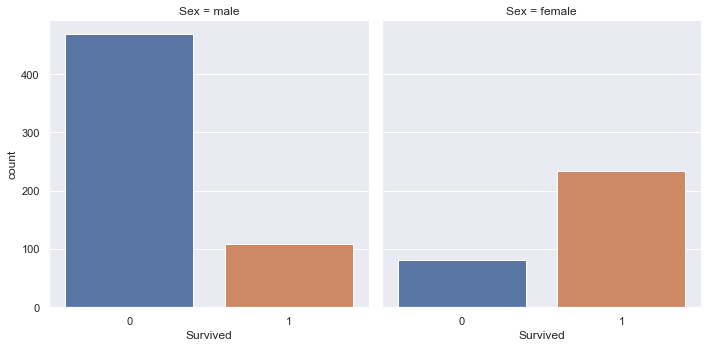

In [19]:
### Check hypothesis: women and children first!
sns.catplot(x='Survived',col='Sex',kind='count',data=df)


***1. Who is more likely to survive? Children or grown-ups?***

<AxesSubplot:xlabel='Sex', ylabel='Age'>

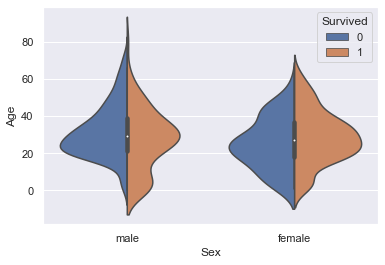

In [20]:
# Violinplot Displays distribution of data
# across all levels of a category.

# Absolute frequency
#sns.set_style("white")
#g = sns.FacetGrid(data = df[df['Age'].notna()], col = 'Survived')
#g.map(plt.hist, "Age");


sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = df, split = True)


Result: 
- Among men, age seems an important driver, especially for kids
- Among women, who have higher survival rates, age is a less important driver

We find evidence for the women and children first hypothesis!  

Next we check survival rates of singles and investigate the role of family size. 
- What do you think?

<AxesSubplot:xlabel='Family_Size', ylabel='Survived'>

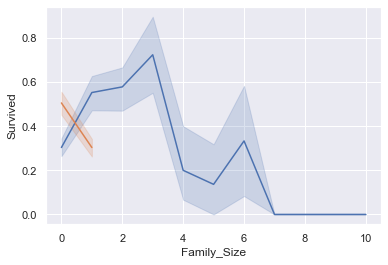

In [21]:
# Adding a column Family_Size
df['Family_Size'] = 0
df['Family_Size'] = df['Parch']+df['SibSp']
 
# Adding a column Alone
df['Alone'] = 0
df.loc[df.Family_Size == 0, 'Alone'] = 1
 
# Factorplot for Family_Size
sns.lineplot(x ='Family_Size', y ='Survived', data = df)
 
# Factorplot for Alone
sns.lineplot(x ='Alone', y ='Survived', data = df)

Result (you can check yourself): 
- singles more likely to be male
- We do not know why large families less likely to survive
    - Because: large families (>4) more likely to be poor
    - Because of more difficult logistics?
    - Other reasons?

Next, we would like to find out which role socio-economic status plays for survival
- can be approximated by Pclass (ticket class 1, 2, 3)

What is your guess and why?

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

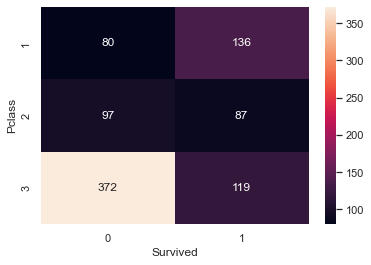

In [22]:
# Group the dataset by Pclass and Survived and then unstack them
group = df.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

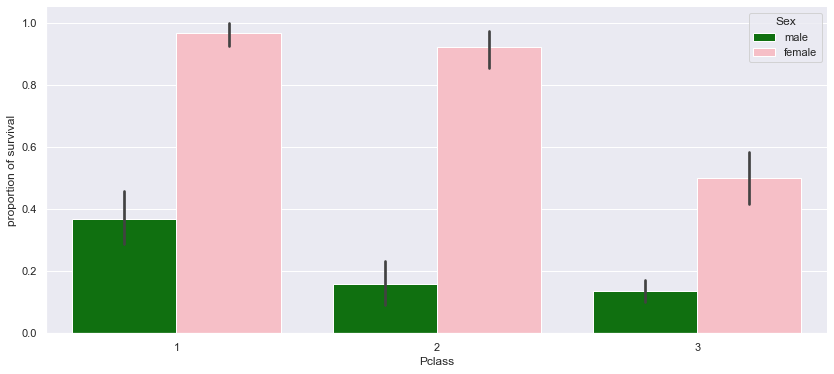

In [23]:
# Correlation of Survived with Sex and Pclass.
plt.figure(figsize=(14,6))
sns.set_palette(sns.color_palette(('green','lightpink')))
sns.barplot(data=df, x="Pclass", hue='Sex', y='Survived', estimator=np.mean);
plt.ylabel('proportion of survival')
sns.despine(top=True, right=True, left=False, bottom=False);

<br>  

<center><img src="figs/titanic_deck.png" , width=300, height=100/> 
    
<p>

**Survival rates depend on**


***Gender*** 
- Whether a passenger is a male or a female plays an important role in determining if one is going to survive.

***Age***
- Good for children
- High for women in the age range 20-50.
- Less for men as the age increases.

***Socio-Economic Status***
- It helps in determining if higher-class passengers had more survival rate than the lower class ones or vice versa. 
- Class 1 passengers have a higher survival chance compared to classes 2 and 3. 
- It implies that class contributes a lot to a passenger’s survival rate.

    
***Family size*** 
- Not to be good to be a single (because you are likely a man) 
- Large household sizes tend to survive less (because you are likely in a low class)

Why does the crew have higher survival rates than the third class although they are at higher decks?

<AxesSubplot:xlabel='survived', ylabel='pclass'>

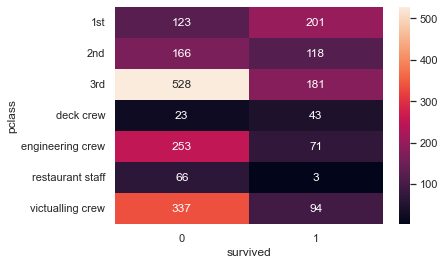

In [25]:
#%%  Compare survival probability of crew vs low class

# Group the dataset by Pclass and Survived and then unstack them
group = df2.groupby(['pclass', 'survived'])
class_survived = group.size().unstack()

# Heatmap - Color encoded 2D representation of data.
sns.heatmap(class_survived, annot = True, fmt ="d")

**We have again the Simpson's paradox at play.**

- At first glance, we saw that the 3rd Class had a higher rate of survival. 
- To rationalize our findings we have to generate a table that breaks the same data down by gender
- When we take gender into consideration, the original impression will be reversed.
- Note that there are more men in the crew group than in the third class group and the reverse is true for women (more women in the third class group than in the crew).
- Since men were less likely to survive than women (“women and children first”) and the crew was mostly males that gave the impression that the crew had a worse survival rate.

**We can think of this paradox as an omitted variable bias, which we will learn later on**

<br>  

<img src="figs\IcecreamDrowning.png" width="500"/> 
    
<p>


**Category 1: Third cause fallacy / Omitted Variable Bias**

The omitted variable that drives both ice cream sales and drownings is seasonality.

- Do ice cream sales cause shark attacks?
- Do ice cream sales cause heart attacks?
- You could also replace ice cream by soda for instance 

**What do you make of the following correlations?**

<br>  

<img src="figs\COVID_5G.jpg" width="500"/> 
    
<p>
 
taken from: https://esmed.org/MRA/mra/article/view/2371
    

We could construction similar graphs taking the distributions of Dominos in the US

<br>  

<img src="figs\Dominos_USA.png" width="400"/> 
    
<p>
    
... or of Subways, McDonalds, dogworms, gonorrea, ...

Countries that have Domino's Pizza

<br>  

<img src="figs\Dominos_world.png" width="400"/> 
    
<p>
    
Taken from  https://commons.wikimedia.org/wiki/File:Domino%27s_pizza_world_map.PNG

Similar careful interpretation is required when you hear about the correlation of

- Co2 consumption and obesity
- Chocolate consumption and nobel laureates (see lecture 1)

Both driven by wealth

***Consider the following graphical representation of Shoe Size and Income***

Do larger people get more income?

<br>  


<img src="figs\shoe1.png" width="300"/> 
    

<p>    
    

The omitted variable is gender    

<br>  


<center><img src="figs\shoe2.png" width="300"/> 
    

<p>